# Simulations Homework

In [ ]:
import numpy as np
import seaborn as sns
%matplotlib inline

---

### Reset Generator Function

If you didn't do so in class, write a function to reseed the numpy random number generator. It should default to setting the seed to 42, but be able to set it to whatever you want.

In [24]:
def rngreset(seed=42) :
    locrng = np.random.default_rng(seed)
    return locrng

Reset the generator using your function.

In [39]:
rng = rngreset(42)

---

### "Accept Cookies" Simulation

Assuming the base rate for hitting the "Accept Cookies" button when landing on a website is 85%, do a set of 10,000 simulations of 20 people visiting a given website and accepting cookies. 

In [29]:
n_visits, p_accept, n_sims = 20, 0.85, 10000
n_accepts = rng.binomial(n_visits, p_accept, n_sims)

Based on your simulation, what is the probability of getting exactly 15 accepts? 

In [32]:
np.sum(n_accepts == 15) / n_sims

0.104

What is the probability of getting *at least* 15 accepts?

In [33]:
sum(n_accepts >= 15) / n_sims

0.9307

What is the probability of getting fewer than 15 accepts?

In [34]:
sum(n_accepts < 15) / n_sims

0.0693

Confirm that the last two probabilities computed sum to 1.0.

---

Check the binomial approximation for the election simulations from the in-class notebook for the cases in which we did and didn't account for the poll-to-poll variability arising from a single poll.

What is the expected standard deviation for our distribution of election outcomes based on the normal approximation?

In [ ]:
np.sqrt(n_voters*p*(1-p))

What was the empirical standard deviation of the distribution of election outcomes when we only used a single probability? ("*single poll, many elections*")

(You can just copy and paste the code from the in-class notebook to regenerate the simulated election outcomes.)

In [ ]:
np.std(elec_results)

What was the empirical standard deviation of the distribution of election outcomes when we accounted for random variation in poll outcomes in our simulation? (*simulate poll -> simulate election*)

In [ ]:
np.std(elec_results)

---

### Effect of Poll Sample Size

As you have probably realized, these distributions of outcomes from many experiments we've been generating are, by definition, *sampl**ing** distributions*! One firm law about sampling distributions is that their width depends strongly on sample size. As such, we would expect our simulated election outcomes to be affected by the size of the poll on which they are based.

In the cell below, run the *simulate poll -> simulate elections* code for poll sample sizes of 50, 100, 500, 1000, 2000 and 5000. For each sample size, record the obtained standard deviation of the distribution of outcomes. (pro tip: make a new code cell below and put them in a Python list)

In [59]:
rng = rngreset(42)

p = 0.51         # best guess of "true" probability
samp_sz = 2000   # poll sample size - WE'LL CHANGE THIS
n_sims = 20000   # number of simulations to run
n_voters = 100000

poll_results = rng.binomial(samp_sz, p, n_sims) # get the polling results

multi_poll_p = poll_results/samp_sz            # convert to probabilities

elec_results = rng.binomial(n_voters, multi_poll_p, n_sims)

1134.0874522917356

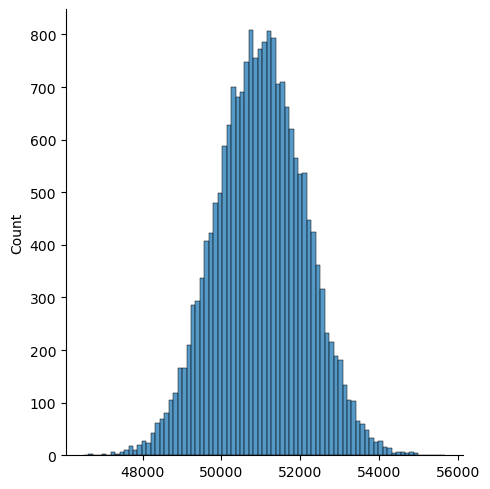

In [60]:
sns.displot(elec_results)
np.std(elec_results)

Make a plot of standard deviation of outcomes (y-axis) vs. poll sample size (x-axis).

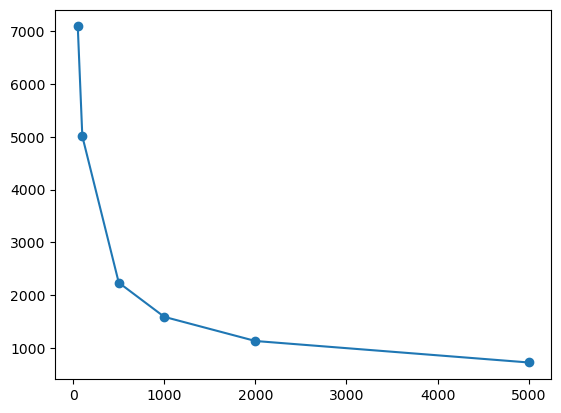

In [58]:
samp_sizes = [50, 100, 500, 1000, 2000, 5000]
emp_sds = [7088.5, 5010.6, 2239.0, 1591.1, 1134.1, 727.5]
import matplotlib.pyplot as plt
plt.plot(samp_sizes, emp_sds, '-o')

Based on this plot, why do you think almost all polls sample around 2000 people?

---

### Re-Write the Multi-Poll Code 

The code for combining three polls using a weighted average works, but it is awkward. Changing it to handle a different number of polls would involve lots of copying and pasting and mistake-prone editing.

Make the code "Pythonic" so that all you have to do is provide a list (or tuple) of poll results and another for poll weights, and your code will do the rest. 

Your code can be just code in a code cell. But if you're feeling spicy, you could make it a function!

In [25]:
rng = rngreset(42)

In [52]:
# constants
orig_poll_ps = [0.53, 0.51, 0.515]      # actual poll results
samp_szs = [2000, 1500, 1200]           # poll sample sizes
n_sims = 20000                          # number of simulations to run
n_voters = 100000                       # expected voter turnout

In [53]:
# calculations based on the constants
n_polls = len(orig_poll_ps)             # number of polls
poll_wts = np.sqrt(samp_szs)            # weights
sum_of_w = np.sum(poll_wts)             # sum of the weights

In [54]:
# Now we do all the things
elec_results = np.zeros((n_polls, n_sims)) # make an array to hold election results

for i in range(n_polls) :                  # cycle through the polls
    # compute the probabilities for each experiment for this poll
    this_poll_results = rng.binomial(samp_szs[i], orig_poll_ps[i], n_sims)/samp_szs[i]
    # compute and weight the election results for this poll
    elec_results[i,:] = poll_wts[i] * rng.binomial(n_voters, this_poll_results, n_sims)
    
# compute the weighted average   
tot_elec_results = np.sum(elec_results, 0) / sum_of_w

<AxesSubplot:ylabel='Count'>

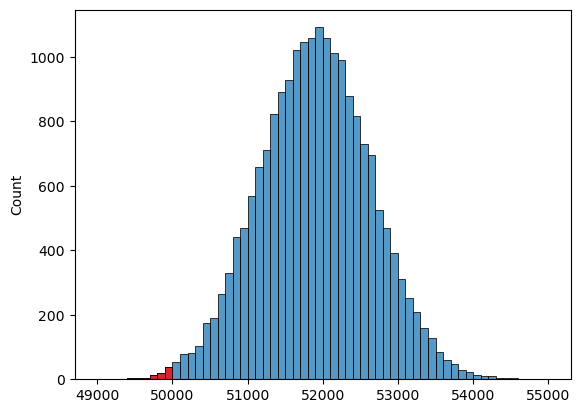

In [62]:
my_bin_rg = (49000, 55000)
sns.histplot(tot_elec_results, binwidth = 100, binrange = my_bin_rg)
sns.histplot(tot_elec_results[tot_elec_results <= n_voters/2],
            binwidth = 100,
            binrange =  my_bin_rg,
            color = 'red')


---

### Weight polls by sample size

Use your new code to compute predicted election outcomes based on 5 polls weighted by the sample sizes of the polls (or their square root, if you prefer – wink wink, nudge nudge). The polls are as follows:

`poll_ests = [.51, .55, .53, .49, 0.50]`

`poll_samp_szs = [2000, 1000, 1500, 1200, 1142]`

Make a plot of the distribution of simulated outcomes, with the area representing the underdog winning highlighted.

---

Bonus (totally optional): 
Write your own function, `my_binom()` that does the same thing as `rng.binomial()`. The function should use `rng.random()` internally. To the user, it should behave just like `rng.binomial()`!

In [ ]:
def my_binom(n_flips = 20, p_head = 0.5, n_sims = 1) :
    n_loc_heads = rng.random()
    n_loc_heads[n_loc_heads <= p_head] = 1
    n_loc_heads[n_loc_heads < 1] = 0
    # UNFINISHED!

---